# 生物医学信号处理 实验报告

16061189 于金泽

## 1. 选取信号

选取的数据集存放在dataset文件夹之下。实验报告的信号处理这一部分，选取的是长度为10s，取样频率1500Hz的信号，首先加在这一信号序列并画出信号的波形图。

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import fftpack
%matplotlib inline

In [2]:
fr = open("dataset/data.txt")

dataArray = []
for line in fr.readlines():
    dataArray.append(float(line))
    
data = np.array(dataArray)
x = np.linspace(0,10,data.size)
print(data.shape)

(15001,)


Text(0.5, 1.0, '选取信号的波形')

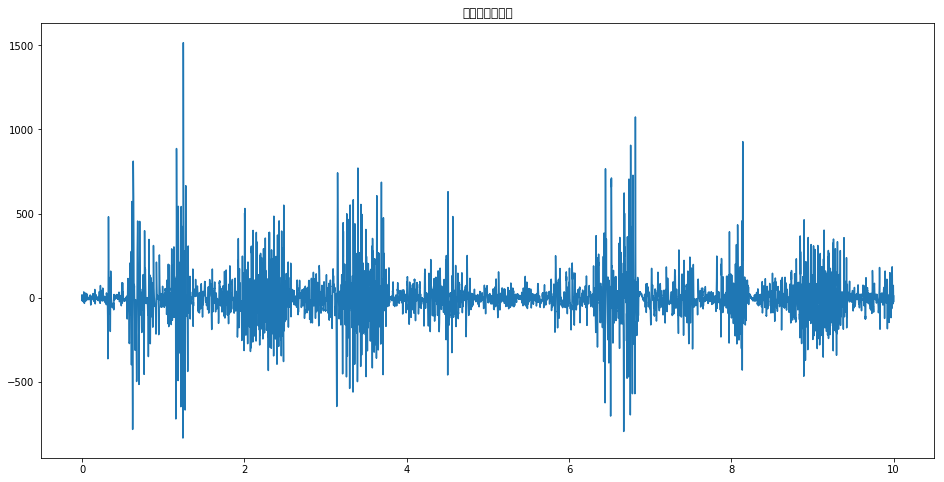

In [3]:
plt.figure(figsize=(16,8))
plt.plot(x, data)
plt.title(u'选取信号的波形')

## 包络线

Hilbert变换及其在单边带（SSB）包络检波中的应用

$H(t)$为Hilbert变换后的时域信号，$f(t)$为原始时域信号。那么其包络为：

$$
\begin {equation}
envelop = \sqrt{H^2(t) + f^2(t)}
\end{equation}
$$

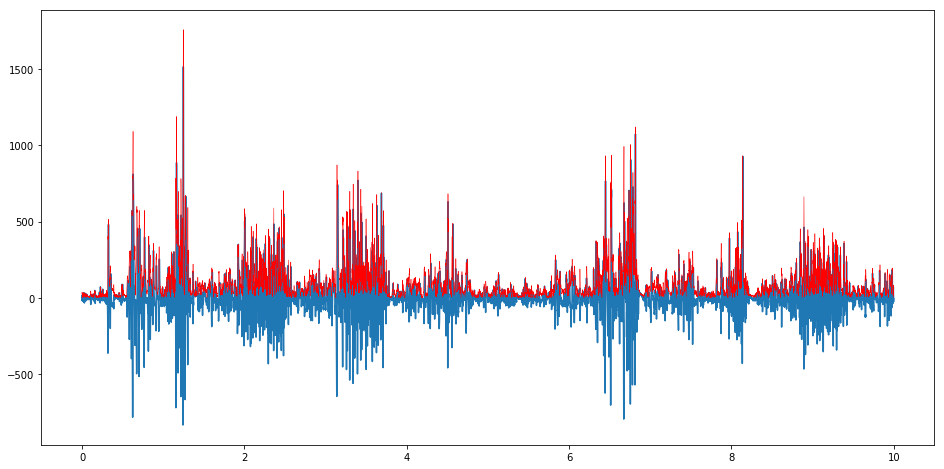

In [5]:
x = x[:-1]
data = data[:-1]
data_H = fftpack.hilbert(data)
plt.figure(figsize=(16,8))
plt.plot(x, data)
plt.plot(x, np.sqrt(data**2 + data_H**2), 'r', linewidth=0.5)

下面是通过取每50个点中的最大、最小值画出的双边包络线

In [6]:
dataReshaped = data.reshape(-1, 50)
XReshaped = x.reshape(-1, 50)

maxIndex = np.argmax(dataReshaped, axis = -1)
maxData = dataReshaped[list(range(dataReshaped.shape[0])), maxIndex]
maxData = np.maximum(maxData, 0)
maxX = XReshaped[list(range(XReshaped.shape[0])), maxIndex]

minIndex = np.argmin(dataReshaped, axis = -1)
minData = dataReshaped[list(range(dataReshaped.shape[0])), minIndex]
minData = np.minimum(minData, 0)
minX = XReshaped[list(range(XReshaped.shape[0])), minIndex]

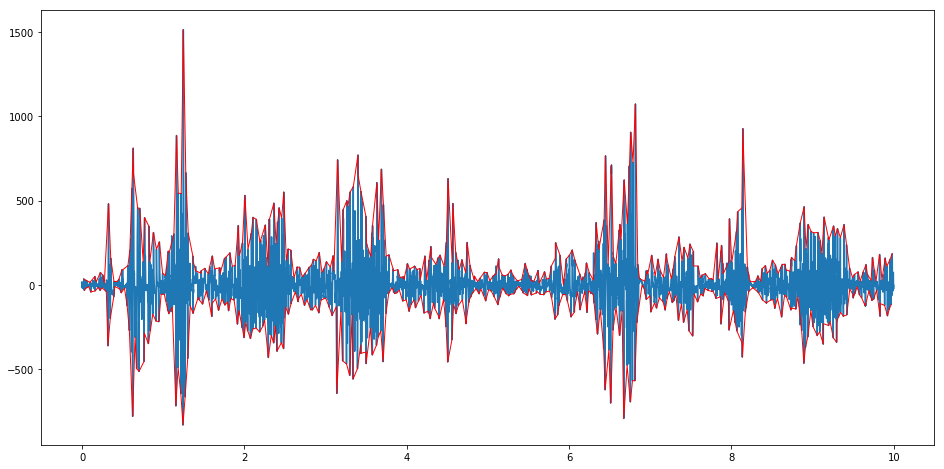

In [7]:
plt.figure(figsize=(16,8))
plt.plot(x, data)
plt.plot(maxX, maxData, 'r', linewidth=1)
plt.plot(minX, minData, 'r', linewidth=1)

## 滤波

带通滤波器

https://wenku.baidu.com/view/78a77282227916888586d71c.html

> [1]吴冬梅,孙欣,张志成, 等.表面肌电信号的分析和特征提取[J].中国组织工程研究与临床康复,2010,14(43):8073-8076. DOI:10.3969/j.issn.1673-8225.2010.43.024.

In [8]:
# b1, a1 = signal.butter(5, [0.065,0.068], 'bandstop')
# dataFilted = signal.filtfilt(b1, a1, data)   #data为要过滤的信号

b, a = signal.butter(7, [0.10,0.6], 'bandpass')
dataFilted = signal.filtfilt(b, a, data)   #data为要过滤的信号

/usr/local/lib/python3.5/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


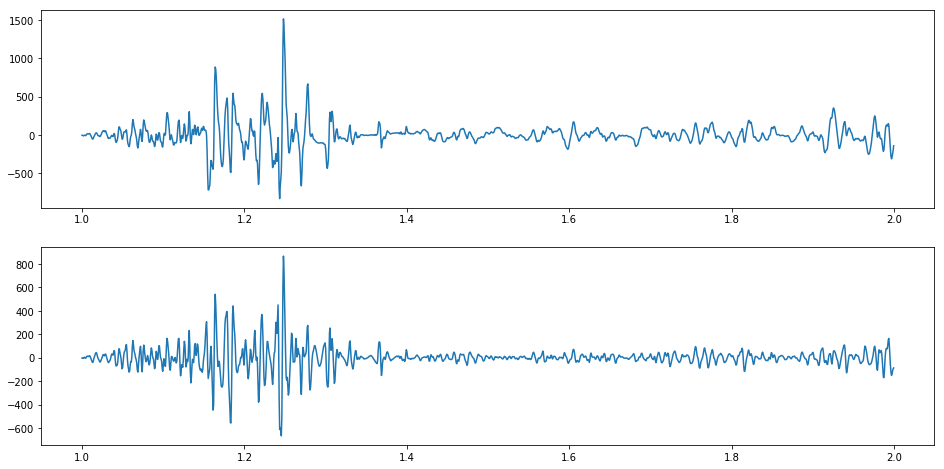

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(x[1500:3000], data[1500:3000])

plt.subplot(212)
plt.plot(x[1500:3000], dataFilted[1500:3000])

## 频谱图

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


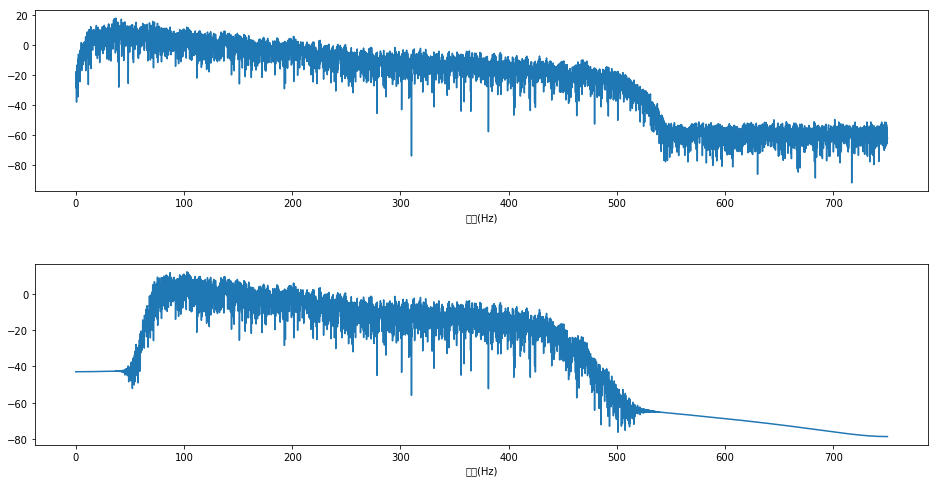

In [10]:
sampling_rate = 1500
fft_size = 15000

dataCutted = data[:fft_size]
data_F = np.fft.rfft(dataCutted)/fft_size
freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
data_FP = 20*np.log10(np.clip(np.abs(data_F), 1e-20, 1e100))

dataFiltedCutted = dataFilted[:fft_size]
dataFilted_F = np.fft.rfft(dataFiltedCutted)/fft_size
dataFilted_FP = 20*np.log10(np.clip(np.abs(dataFilted_F), 1e-20, 1e100))


plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(freqs, data_FP)
plt.xlabel(u"频率(Hz)")
plt.subplot(212)
plt.plot(freqs, dataFilted_FP)
plt.xlabel(u"频率(Hz)")
plt.subplots_adjust(hspace=0.4)

## 分类器

### 数据预处理

该数据集下的所有行为和对应的时间如下

1. 0-11 行走
2. 12-19 跑步
3. 20-24 行走
4. 25-31 跳跃
5. 32-34 站立
6. 35-39 跳跃
7. 54-60 站立

$[stand, walk, run, jump]$

In [130]:
fr = open("cnn_data.txt")

dataArray = []
for line in fr.readlines():
    dataArray.append(float(line))
    
data = np.array(dataArray)
x = np.linspace(0,10,data.size)
print(data.shape)

(92340,)


In [131]:
data = data[:92250]
data = data.reshape(123, 750)
print(data.shape)

(123, 750)


In [160]:
x_train = data[0:22, :]
y_train = np.tile(np.array([0,1,0,0]), 22)

x_train = np.append(x_train, data[24:38, :])
y_train = np.append(y_train, np.tile(np.array([0,0,1,0]), 14))

x_train = np.append(x_train, data[40:48, :])
y_train = np.append(y_train, np.tile(np.array([0,1,0,0]), 8))

x_train = np.append(x_train, data[50:62, :])
y_train = np.append(y_train, np.tile(np.array([0,0,0,1]), 12))

x_train = np.append(x_train, data[64:68, :])
y_train = np.append(y_train, np.tile(np.array([1,0,0,0]), 4))

x_train = np.append(x_train, data[70:78, :])
y_train = np.append(y_train, np.tile(np.array([0,0,0,1]), 8))

x_train = np.append(x_train, data[108:120, :])
y_train = np.append(y_train, np.tile(np.array([0,1,0,0]), 12))

x_train = x_train.reshape(-1, 750, 1)
y_train = y_train.reshape(-1, 4)

print(x_train.shape)
print(y_train.shape)

(80, 750, 1)
(80, 4)


In [167]:
from keras import layers
from keras.layers import Input, Dense, BatchNormalization
from keras.layers import MaxPooling1D, Conv1D, Flatten
from keras.models import Model, load_model
from keras.applications.imagenet_utils import preprocess_input

In [162]:
X_input = Input(shape=(750,1))
X = Conv1D(20, 3, activation='relu', padding='same')(X_input)
X = Conv1D(10, 3, activation='relu', padding='same')(X)
X = Conv1D(3, 3, activation='relu', padding='same')(X)
X = Flatten()(X)
y = Dense(4, activation='softmax')(X)
model = Model(inputs=X_input, outputs=y)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])
model.fit(x_train, y_train, epochs=100)

In [142]:
preds = model.evaluate(x = x_train, y = y_train)
print ("Loss = ", preds[0])
print ("Test Accuracy = ", preds[1])

80/80 [==============================] - 0s 4ms/step
Loss =  0.13750033751130103
Test Accuracy =  0.725


In [168]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 750, 1)            0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 750, 20)           80        
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 750, 10)           610       
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 750, 3)            93        
_________________________________________________________________
flatten_19 (Flatten)         (None, 2250)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 9004      
Total params: 9,787
Trainable params: 9,787
Non-trainable params: 0
_________________________________________________________________


查看测试结果

In [143]:
x_test = np.expand_dims(x_train[66], axis=0)
y_pred = model.predict(x_test)
print('Ypred: ', y_pred)
print('Ytrain: ', y_train[66])

Ypred:  [[0.0000000e+00 5.7110977e-10 0.0000000e+00 1.0000000e+00]]
Ytrain:  [0 0 0 1]


下面是训练集中，预测结果与期望结果相符的训练用例：

In [170]:
correct = []
for i in range(80):
    x_test = np.expand_dims(x_train[i], axis=0)
    y_pred = model.predict(x_test)
    if (np.dot(y_train[i].reshape(1,4), y_pred.T) > 0.5):
           correct.append(i)
            
print("分类正确的样例：", correct)
print("准确率：", len(correct)/80)

分类正确的样例： [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 53, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
准确率： 0.725


但是结合前面人工查看的结果，发现很多的输出结果都为第1类，下面查看输出结果不为第1类的训练用例以及这里面输出正确的用例：

In [171]:
notOne = []
correct = []
for i in range(80):
    x_test = np.expand_dims(x_train[i], axis=0)
    y_pred = model.predict(x_test)
    if (y_pred[0,1] < 0.5):
        notOne.append(i)
        if (np.dot(y_train[i].reshape(1,4), y_pred.T) > 0.5):
            correct.append(i)
            
print("所有输出结果不为第1类的有：", notOne)
print("这其中分类正确的有：", correct)

所有输出结果不为第1类的有： [12, 25, 31, 44, 46, 47, 48, 49, 53, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66]
这其中分类正确的有： [44, 46, 47, 48, 49, 53, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66]


由于模型在训练时的初始化是随机的，最终可能会得到在不同的局部最优点停止的模型。因此训练出的模型的效果与随机因素有关。进行了多次的模型训练，每次100个epoch，得到的比较好的模型的准确率为72.5%。下面保存了这个较好的模型，使用之后的一条语句可以加载这个预训练的模型。

In [146]:
model.save('newModel.h5')

In [169]:
model = load_model('model.h5')